## Part 1: Text Preprocessing and Exploration

Let's import the required libraries and load our dataset:

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter

# For text preprocessing
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.util import ngrams
from nltk.tag import pos_tag

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


In [ ]:
# For dataset loading
from sklearn.datasets import fetch_20newsgroups

# Set random seed for reproducibility
np.random.seed(42)

# Load a subset of the 20 Newsgroups dataset
categories = ['comp.graphics', 'rec.autos', 'sci.space', 'talk.politics.misc']
newsgroups = fetch_20newsgroups(subset='train', categories=categories, random_state=42)

# Create a DataFrame for easier manipulation
df = pd.DataFrame({
    'text': newsgroups.data,
    'category': [newsgroups.target_names[target] for target in newsgroups.target]
})

# Preview the data
print(f"Dataset shape: {df.shape}")
print("\nCategory distribution:")
print(df['category'].value_counts())
print("\nSample document:")
print(df['text'][10][:500])  # Print first 500 characters of a sample document

### Step 1: Basic Data Exploration
Let's examine the length characteristics of our documents:

In [ ]:

df['post_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['sentence_count'] =df['text'].apply(lambda x: len(sent_tokenize(str(x))))

# Create visualizations to understand the data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['word_count'], bins=20)
plt.title('Distribution of Newsgroup Post Lengths By Word')
plt.xlabel('Word Count')

plt.subplot(1, 2, 2)
sns.boxplot(x="category", y='word_count', data=df)
plt.title('Post Length by Category')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

### Step 2: Text Cleaning and Preprocessing Function
Let's create a comprehensive text preprocessing function that incorporates all the techniques we've learned:

In [ ]:
def clean_text(text_tokens):
    # Convert to lowercase
    text_tokens = [text_token.lower() for text_token in text_tokens]
        
    cleaned = []
    # Remove punctuation but keep numbers
    for text_token in text_tokens:    
        no_punc = re.sub(r'[^\w\s]', '', text_token)
     
        if no_punc and not no_punc.isspace():
            cleaned.append(no_punc)

    return cleaned


In [ ]:
stop_words = set(stopwords.words('english'))

# remove stopwords
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]


In [ ]:
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()

    def get_wordnet_pos(treebank_tag):
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN
    
    # tag with parts of speech
    tokens_tagged = pos_tag(tokens)
      
    # convert to WordNet POS tags
    pos_tokens = [(word[0], get_wordnet_pos(word[1])) for word in tokens_tagged]
        
    # lemmatize with POS tags
    lemmatized = [lemmatizer.lemmatize(word[0], word[1]) for word in pos_tokens]
        
    return lemmatized

In [ ]:
initial_clean = df['tokens'].apply(clean_text)

In [ ]:
step2_clean = initial_clean.apply(remove_stopwords)

In [ ]:
step3_clean = step2_clean.apply(lemmatize_tokens)

In [ ]:
step2_clean

In [ ]:
# Sentence and word tokenization
df['sentences'] = df['text'].apply(sent_tokenize)
df['tokens'] = df['text'].apply(word_tokenize)

def cleaning_preprocessing_pipeline(text):
    # initial cleaning of word tokens
    def clean_text(text_tokens):
        """
        1. Converts to lowercase
        2. Removes HTML tags and special characters
        3. Handle common 
        """
        # Convert to lowercase
        text_tokens = [text_token.lower() for text_token in text_tokens]
        
        cleaned = []
        # Remove punctuation but keep numbers
        for text_token in text_tokens:    
            no_punc = re.sub(r'[^\w\s]', '', text_token)
        
            if no_punc and not no_punc.isspace():
                cleaned.append(no_punc)

        return cleaned

    # get English stopwords
    stop_words = set(stopwords.words('english'))

    # remove stopwords
    def remove_stopwords(tokens):
        return [token for token in tokens if token not in stop_words]

    # initialize lemmatizer
    lemmatizer = WordNetLemmatizer()

    # helper function for lemmatization with POS tagging
    def get_wordnet_pos(treebank_tag):
        """
        Convert NLTK POS tags to WordNet POS tags
        """
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN

    # lemmatize
    def lemmatize_tokens(tokens):
        # tag with parts of speech
        tokens_tagged = pos_tag(tokens)
        
        # convert to WordNet POS tags
        pos_tokens = [(word[0], get_wordnet_pos(word[1])) for word in tokens_tagged]
        
        # lemmatize with POS tags
        lemmatized = [lemmatizer.lemmatize(word[0], word[1]) for word in pos_tokens]
        
        return lemmatized



### Step 3: Apply Preprocessing and Analyze Results
Now let's apply our preprocessing function to the dataset and examine the results:

In [ ]:
# apply cleaning pipline to all text
df['processed_tokens'] = df['tokens'].apply(cleaning_preprocessing_pipeline)



In [ ]:
df['processed_tokens']

### Step 4: Token Frequency Analysis
Let's analyze the most common words in each category after preprocessing:

In [ ]:
# Assign the count of unique word tokens across all reviews
lst_tokens = df['tokens']
lst_words = [item for sublist in lst_tokens for item in sublist]

dict_all_tokens = {}
for word in lst_words:
    if word in dict_all_tokens:
        dict_all_tokens[word] += 1
    else:
        dict_all_tokens[word] = 1

all_tokens = [(token, count) for token, count in dict_all_tokens.items()]
unique_token_count_pre = len(all_tokens)



### Step 5: N-gram Analysis
Let's go beyond single words and look at common bigrams and trigrams:

In [ ]:
# Function to generate bigrams and trigrams
def generate_ngrams(tokens, n):
    """
    Generate n-grams from a list of tokens
 
    Parameters:
    tokens (list): List of tokens
    n (int): Size of n-grams to generate
        
    Returns:
    list: List of n-grams as tuples
    """
    result = {}
    for n in n:
        result[f'{n}-grams'] = list(ngrams(tokens, n))
    return result

# Generate bigrams and trigrams - hint - apply lamdba function
b_n = [2]
t_n = [3]

df['bigrams'] = df['lemmatized_tokens'].apply(lambda x: generate_ngrams(x, b_n))
df['trigrams'] = df['lemmatized_tokens'].apply(lambda x: generate_ngrams(x, t_n))


## Part 2: Time Series Analysis and Modeling

### Step 1: Data Loading and Initial Exploration
First, let's load the S&P 500 historical data and perform initial exploration.

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['^GSPC']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


S&P 500 Dataset:
Empty DataFrame
Columns: [(Adj Close, ^GSPC), (Close, ^GSPC), (High, ^GSPC), (Low, ^GSPC), (Open, ^GSPC), (Volume, ^GSPC)]
Index: []

Dataset information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, ^GSPC)  0 non-null      float64
 1   (Close, ^GSPC)      0 non-null      float64
 2   (High, ^GSPC)       0 non-null      float64
 3   (Low, ^GSPC)        0 non-null      float64
 4   (Open, ^GSPC)       0 non-null      float64
 5   (Volume, ^GSPC)     0 non-null      float64
dtypes: float64(6)
memory usage: 0.0 bytes
None

Summary Statistics:
Ticker  ^GSPC
count     0.0
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN

Missing values in each column:
Price      Ticker
Adj Close  ^GSPC     0.0
Close      ^GSPC     0.0
High       ^GSPC     0.0
Low        ^GSPC     

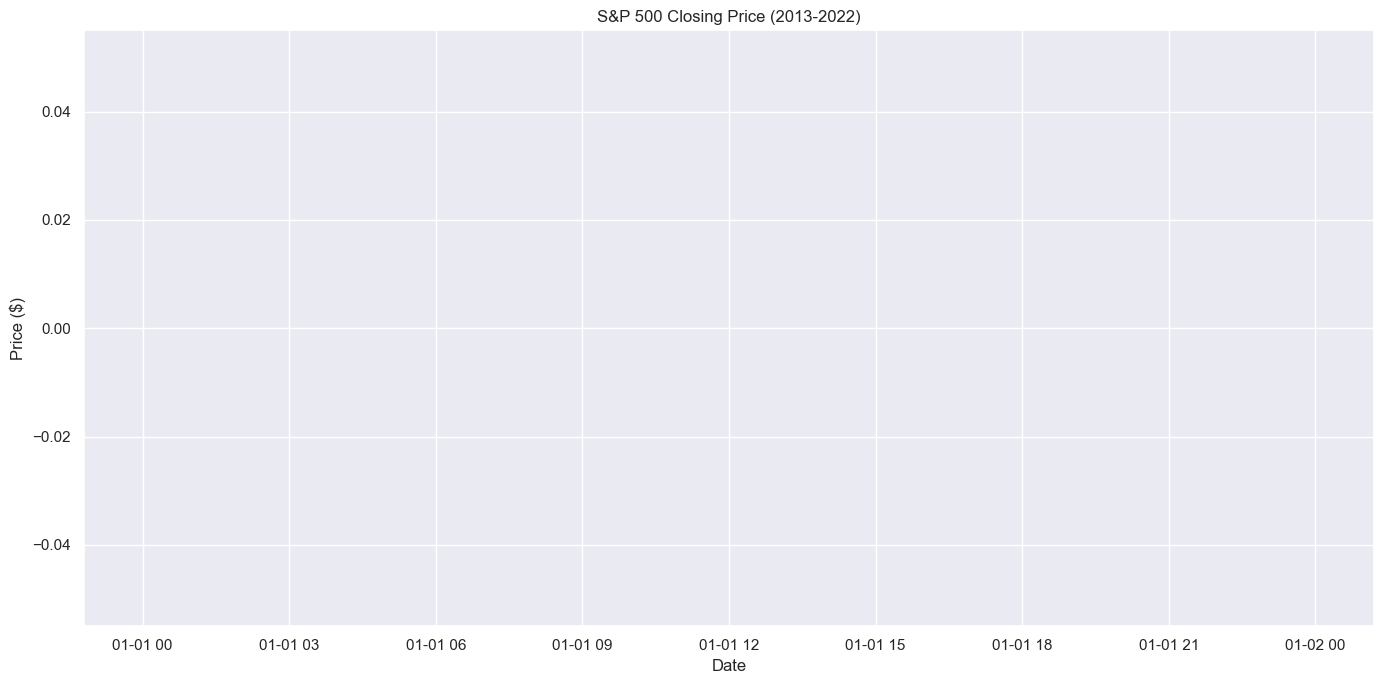


Selected time series shape: (0, 1)


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_theme()

# Download S&P 500 data for the last 10 years
sp500 = yf.download('^GSPC', start='2013-01-01', end='2022-12-31')

# Display the first few rows of the dataset
print("S&P 500 Dataset:")
print(sp500.head())

# Display basic information about the dataset
print("\nDataset information:")
print(sp500.info())

# Calculate basic summary statistics
print("\nSummary Statistics:")
print(sp500['Close'].describe())

# Check for missing values
print("\nMissing values in each column:")
print(sp500.isnull().sum())

# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(sp500.index, sp500['Close'])
plt.title('S&P 500 Closing Price (2013-2022)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Select the closing price as our primary time series for analysis
ts_data = sp500['Close']
print("\nSelected time series shape:", ts_data.shape)

### Step 2: Time Series Characteristics and Visualization
Let's analyze the characteristics of the time series through various visualizations.

### Step 3: Stationarity Testing and Transformation
Now, let's test for stationarity using the Dickey-Fuller test and apply transformations to make the data stationary.

### Step 4: Time Series Decomposition
Let's decompose our time series into trend, seasonal, and residual components.

### Step 5: Autocorrelation Analysis
Now, let's analyze the autocorrelation structure of our stationary series.

### Step 6: Time Series Modeling
Finally, let's build and evaluate time series models based on our analysis.

## Part 3: Neural Networks Implementation and Optimization

### Step 1: Load libraries and prepare the datasets

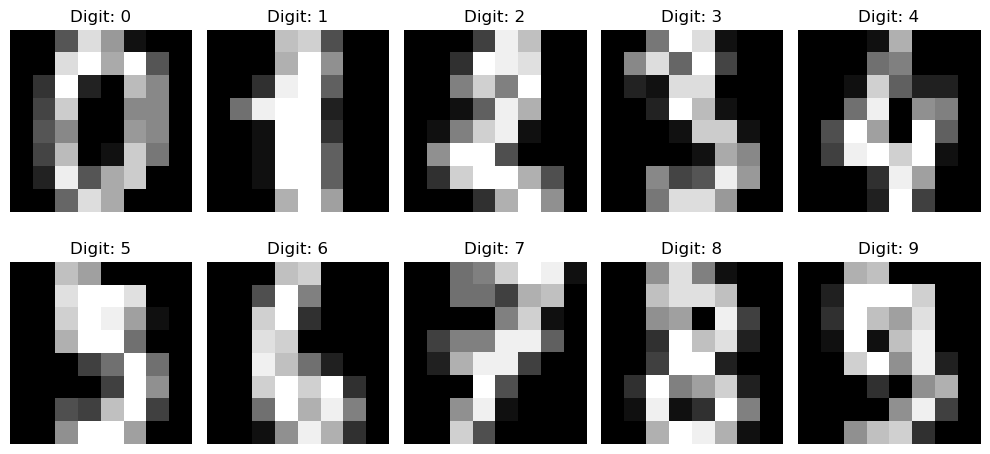

Digits dataset: 1797 samples, 64 features


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.datasets import load_digits

# For deep learning
import tensorflow as tf
from tensorflow import keras
from keras import layers

# For PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)

# Load Digits dataset for classification
digits = load_digits()
X_digits = digits.data / 16
y_digits = digits.target


# Display sample digits
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Digit: {digits.target[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Print information about dataset
print(f"Digits dataset: {X_digits.shape[0]} samples, {X_digits.shape[1]} features")

In [ ]:
X_digits_df = pd.DataFrame(X_digits)
y_digits_df = pd.DataFrame(y_digits)

In [11]:
X_digits_nan_count = X_digits_df.isnull().any(axis=1).sum()
y_digits_nan_count = y_digits_df.isnull().any(axis=1).sum()
X_digits_nan_count, y_digits_nan_count

(0, 0)

### Step 2: Preprocess data for neural networks

In [12]:
# 1st split: 0.8 train+val 0.2 test
X_train_val, X_test, y_train_val, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

# 2nd split: 0.75 train 0.25 val
X_train, X_val, y_train, y_val = train_test_split(X_digits, y_digits, test_size=0.25, random_state=42)


### Step 3: Build a basic MLP for digits classification using TensorFlow/Keras

In [40]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(64,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
43/43 [==============================] - 0s 4ms/step - loss: 1.8681 - accuracy: 0.5590 - val_loss: 1.2954 - val_accuracy: 0.7917
Epoch 2/30
43/43 [==============================] - 0s 2ms/step - loss: 0.8958 - accuracy: 0.8523 - val_loss: 0.5562 - val_accuracy: 0.8833
Epoch 3/30
43/43 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.9035 - val_loss: 0.3295 - val_accuracy: 0.9222
Epoch 4/30
43/43 [==============================] - 0s 2ms/step - loss: 0.2835 - accuracy: 0.9347 - val_loss: 0.2371 - val_accuracy: 0.9417
Epoch 5/30
43/43 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9532 - val_loss: 0.2028 - val_accuracy: 0.9361
Epoch 6/30
43/43 [==============================] - 0s 2ms/step - loss: 0.1779 - accuracy: 0.9547 - val_loss: 0.1677 - val_accuracy: 0.9472
Epoch 7/30
43/43 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9621 - val_loss: 0.1534 - val_accuracy: 0.9500
Epoch 8/30
43/43 [==

### Step 4: Implement the digits classification model in PyTorch

In [15]:
# Convert to PyTorch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)  # Long tensor for classification
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.long)


In [34]:
class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_classes=10):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Initialize model
input_size = X_train_t.shape[1]
hidden_size = 64
output_size = 10

mlp_model = MLPClassifier(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.01)

In [35]:
# train the model
train_ds = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)

num_epochs = 30
for epoch in range(num_epochs):
    for batch_x, batch_y in train_ds:
        optimizer.zero_grad()
        outputs = mlp_model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

### Step 5: Experiment with different activation functions (TensorFlow)

In [41]:
model2 = keras.Sequential([
    keras.layers.Dense(128, activation='LeakyReLU', input_shape=(64,)),
    keras.layers.Dense(64, activation='LeakyReLU'),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
43/43 [==============================] - 0s 4ms/step - loss: 1.7614 - accuracy: 0.5672 - val_loss: 1.0969 - val_accuracy: 0.8139
Epoch 2/30
43/43 [==============================] - 0s 2ms/step - loss: 0.7272 - accuracy: 0.8701 - val_loss: 0.4474 - val_accuracy: 0.8917
Epoch 3/30
43/43 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.9198 - val_loss: 0.2845 - val_accuracy: 0.9222
Epoch 4/30
43/43 [==============================] - 0s 1ms/step - loss: 0.2430 - accuracy: 0.9399 - val_loss: 0.2167 - val_accuracy: 0.9444
Epoch 5/30
43/43 [==============================] - 0s 2ms/step - loss: 0.1876 - accuracy: 0.9562 - val_loss: 0.1896 - val_accuracy: 0.9417
Epoch 6/30
43/43 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9577 - val_loss: 0.1603 - val_accuracy: 0.9417
Epoch 7/30
43/43 [==============================] - 0s 2ms/step - loss: 0.1427 - accuracy: 0.9666 - val_loss: 0.1476 - val_accuracy: 0.9556
Epoch 8/30
43/43 [==

In [42]:
model3 = keras.Sequential([
    keras.layers.Dense(128, activation='tanh', input_shape=(64,)),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
43/43 [==============================] - 0s 6ms/step - loss: 1.6891 - accuracy: 0.5761 - val_loss: 0.9995 - val_accuracy: 0.8361
Epoch 2/30
43/43 [==============================] - 0s 2ms/step - loss: 0.7188 - accuracy: 0.8909 - val_loss: 0.4756 - val_accuracy: 0.9056
Epoch 3/30
43/43 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.9302 - val_loss: 0.3102 - val_accuracy: 0.9333
Epoch 4/30
43/43 [==============================] - 0s 2ms/step - loss: 0.2891 - accuracy: 0.9443 - val_loss: 0.2372 - val_accuracy: 0.9417
Epoch 5/30
43/43 [==============================] - 0s 2ms/step - loss: 0.2244 - accuracy: 0.9599 - val_loss: 0.1955 - val_accuracy: 0.9528
Epoch 6/30
43/43 [==============================] - 0s 3ms/step - loss: 0.1866 - accuracy: 0.9599 - val_loss: 0.1601 - val_accuracy: 0.9556
Epoch 7/30
43/43 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.9651 - val_loss: 0.1488 - val_accuracy: 0.9556
Epoch 8/30
43/43 [==